# Import Necessary Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load Data from CSV

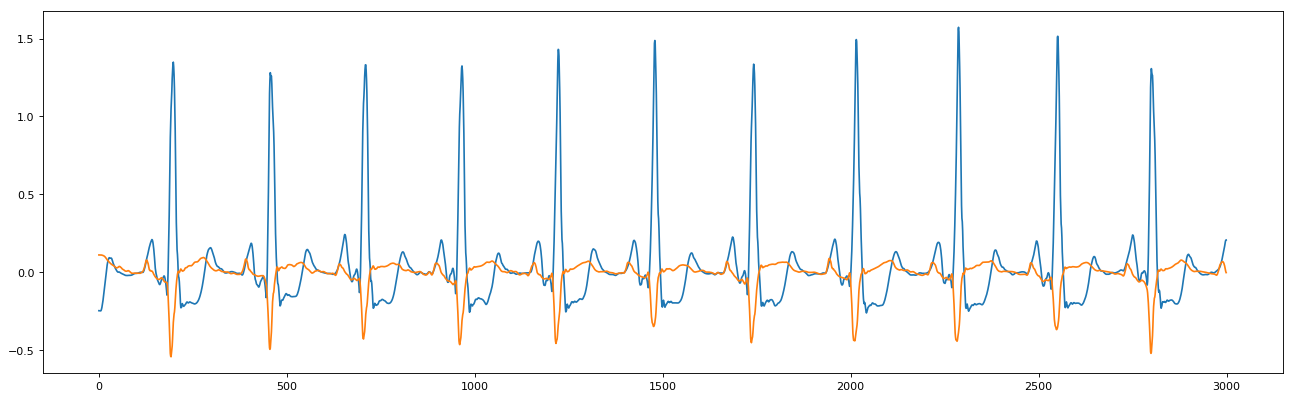

In [2]:
DS2 = ['100', '103', '105', '111', '113', '117', '121', '123', '200', '202', '210', '212', 
       '213', '214', '219', '221', '222', '228', '231', '232', '233', '234']

testingSet_leads = {}
testingSet_anns = {}
for ds in DS2:
    testingSet_leads[ds] = pd.read_csv('D:/Data/Cleaned Data/TestingSet/' + ds + '_lead.csv')
    testingSet_anns[ds] = pd.read_csv('D:/Data/Cleaned Data/TestingSet/' + ds + '_ann.csv')

# 测试读取情况
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(testingSet_leads['105'][:3000])
plt.show()

# Heartbeat Annotation

In [3]:
N = ['N', 'L', 'R', 'e', 'j']
SVEB = ['A', 'a', 'J', 'S']
VEB = ['V', 'E']
F = ['F']
Q = ['P', 'f', 'U']
Non_beat_anns = ['[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', '~', '^', '|', '+', 's', 'T', '*', 'D', '=', '"', '@']

In [21]:
a = 300
list(testingSet_anns[ds]['annIdx'][310: 320])

[74094, 74282, 74439, 74596, 74853, 75084, 75318, 75517, 75785, 76059]

In [9]:
ds = '200'
a = 20
while a < len(testingSet_anns[ds]):
    temp = list(testingSet_anns[ds]['annType'][a-20:a])
    for i in range(len(temp)):
        if temp[i] in N:
            temp[i] = 'N'
        if temp[i] in VEB:
            temp[i] = 'V'
        if temp[i] in SVEB:
            temp[i] = 'S'
    a += 20
    print(set(temp))
    

{'+', 'V', 'N'}
{'V', 'N'}
{'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'N'}
{'N'}
{'+', 'V', 'N'}
{'V', 'N'}
{'+', 'V', 'N', 'S'}
{'~', '+', 'V', 'N'}
{'~', '+', 'V', 'N'}
{'V', '~', 'N', 'S'}
{'V', 'N'}
{'V', 'N'}
{'V', 'N'}
{'V', 'N'}
{'~', 'V', 'N'}
{'+', 'V', 'N'}
{'V', '+', '~', 'N'}
{'~', 'V', 'N'}
{'V', '+', '~', 'N'}
{'~', '+', 'V', 'N'}
{'V', 'N'}
{'~', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N', 'S'}
{'V', 'N'}
{'+', 'V', 'N', 'S'}
{'+', 'V', 'N'}
{'~', '+', 'V', 'N'}
{'~', '+', 'V', 'N'}
{'+', 'V', 'N'}
{'+', 'V', 'N', 'S'}
{'+', 'V', 'N'}
{'N'}
{'N'}
{'+', 'V', 'N'}
{'~', 'V', 'N'}
{'V', '~', 'N'}
{'F', '~', 'N', '+', 'V'}
{'~', '+', 'V', 'N'}
{'~', 'N', '+', 'V', 'S'}
{'+', 'V', 'N'}
{'V', 'N'}
{'V', 'N'}
{'V', 'N'}
{'~', 'V', 'N'}
{'+', 'V', 'N', 'S'}
{'+', 'V', 'N'}
{'V', 'N', 'S'}
{'+', 'V', 'N', 'S'}
{'~', '+', 'V', 'N'}
{'N', 'S'}
{'+', 'V', 'N'}
{'+', 'V', 'N', 'S

In [23]:
plt.figure(figsize=(20, 6), dpi=200)
plt.plot(testingSet_leads['200']['lead0'][74000:77000])
plt.savefig('ecg')

# Heatbeat Segmentation

For each heartbeat knowing the R location, we take samples from the interval of 250 ms before R peak and 400 ms after R peak, i.e. total 0.65 s of each heartbeat. That is, 90 samples before R peak and 144 samples after R peak.

In [4]:
Hbs = {}
for ds in DS2:
    lead0 = testingSet_leads[ds]['lead0']
    lead1 = testingSet_leads[ds]['lead1']
    hbs0 = []
    hbs1 = []
    anns = []
    annIdxs = []
    for row in testingSet_anns[ds].itertuples():
        if row[2] in Non_beat_anns:
            continue
        elif row[1] < 91:
            continue
        elif row[1] + 144 > len(lead0):
            continue
        else:
            anns.append(row[2])
            annIdxs.append(row[1] - 1)
            hbs0.append(lead0[row[1] - 91: row[1] + 144])
            hbs1.append(lead1[row[1] - 91: row[1] + 144])
    Hbs[ds] = pd.DataFrame({'lead0': hbs0, 'lead1': hbs1, 'ann': anns, 'annIdx': annIdxs})

In [46]:
Hbs['212'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1,...,cD2_0,cD1_0,cA7_1,cD7_1,cD6_1,cD5_1,cD4_1,cD3_1,cD2_1,cD1_1
0,R,213,123 -0.018026 124 -0.015381 125 -0.01271...,123 0.020501 124 0.021223 125 0.02241...,NaN,237.0,0.710302,1.509921,3.328466,2.993703,...,"[-0.00498388323119, -0.000536713313028, 0.0013...","[-0.0018699027844, -0.00140019569705, -0.00057...","[2.51813700218, -2.22407630833]","[-2.44774647773, -2.239732143]","[0.100003027861, -2.63452443389, 0.72685186746...","[-0.0264560676094, 0.0722385473243, -0.6041669...","[0.0251153787361, -0.0574983312921, 0.08328499...","[0.00383721834629, 0.00741404243421, -0.011636...","[-0.00163671785364, 0.00393963072853, 0.005071...","[-0.000510631225577, -0.000114193561868, 0.000..."
1,R,450,360 -0.011440 361 -0.010659 362 -0.01063...,360 -0.009200 361 -0.010141 362 -0.01070...,237.0,245.0,-0.045715,1.497232,1.113832,2.876102,...,"[-8.7569220453e-06, 0.0017297374217, -1.809148...","[-0.000551789328505, 0.000579875963874, 0.0009...","[2.6707326717, -2.40714697893]","[-2.58846094557, -2.28978378137]","[-0.0406476612387, -2.87580307278, 0.995477590...","[-0.0597092300302, 0.0824738400403, -0.5608095...","[-0.00674430028668, -0.0839815528784, 0.075942...","[-0.000496197010765, -0.00466381074999, 0.0050...","[0.0011110299676, -0.000868166243298, -0.00119...","[0.000665710860878, 0.000113394790224, -0.0004..."
2,R,695,605 -0.001354 606 -0.002580 607 -0.00391...,605 -0.001016 606 -0.000474 607 -0.00006...,245.0,228.0,0.597386,1.450627,3.704710,2.501981,...,"[0.00272886933342, 0.00507913782784, 0.0027182...","[0.000867076769115, 0.00110443166488, 0.001515...","[2.58488489806, -2.20943400221]","[-2.46000788032, -2.15386004447]","[0.056438310023, -2.74683960477, 0.90378291690...","[-0.101403584674, 0.0474504297663, -0.67749024...","[0.00205614320554, -0.11295408595, 0.086224443...","[-0.00275892218531, 0.00862318959016, -0.04194...","[-0.000899853412386, -0.0012526991791, 0.00123...","[-0.00038311275926, -0.000311581374993, -0.000..."
3,R,923,833 -0.003528 834 -0.004156 835 -0.00...,833 0.009640 834 0.007937 835 0.00...,228.0,244.0,-0.105185,1.442696,1.157871,2.827969,...,"[0.00170693615024, -0.0006575103762, -0.003306...","[0.00044415313282, 0.00103332803931, 0.0005792...","[2.42479236088, -2.26517381161]","[-2.36841448011, -2.17565830067]","[0.062033745498, -2.6830622003, 0.954660464096...","[-0.0597574340782, 0.0397227253372, -0.5570308...","[0.00761695137769, -0.0973880938109, 0.0212090...","[0.00889942856273, -0.000901254164042, -0.0037...","[0.00312837231226, 0.00184637494774, -0.000102...","[0.00120402621736, 0.00131315719666, 0.0010539..."
4,R,1167,1077 -0.018110 1078 -0.018893 1079 -0.01...,1077 0.011305 1078 0.011878 1079 0.01...,244.0,272.0,0.878095,1.357887,3.489078,2.115101,...,"[-3.40943764068e-06, -0.00165833908517, -0.000...","[0.000553716191057, -0.000332769083719, -0.000...","[2.92873199189, -2.73796641584]","[-2.86220861692, -2.01944668683]","[0.143903640249, -3.24089253753, 1.42799326316...","[-0.0957457449855, 0.0283377969035, -0.6147772...","[0.0105228675795, -0.0431881567128, -0.0293315...","[0.00531948182679, -0.00563012693559, -0.03509...","[0.000275827071199, 0.00288434820668, 0.000236...","[-0.000404637165792, 0.000430286681577, 0.0009..."
5,R,1439,1349 -0.004912 1350 -0.003729 1351 -0.00...,1349 -0.012070 1350 -0.010872 1351 -0.00...,272.0,267.0,1.000084,1.507676,3.962552,2.597831,...,"[0.000315492637668, 0.00400728719999, 0.001054...","[-0.000836661890142, 0.000733494807771, 0.0014...","[2.68691239359, -2.38852581731]","[-2.59598292364, -2.10214311405]","[0.122799485614, -2.84349796107, 1.13989047877...","[-0.118328990746, 0.0255326575782, -0.61212082...","[-0.0372393648793, -0.00997818887613, -0.05911...","[-0.00937239305242, -0.0162710910662, -0.02774...","[-0.00263304556597, -0.00412978167737, -0.0052...","[-0.00084692459754, -0.00103426630984, -0.0012..."
6,R,1706,1616 -0.019762 1617 -0.021387 1618 -0.02...,1616 0.007756 1617 0

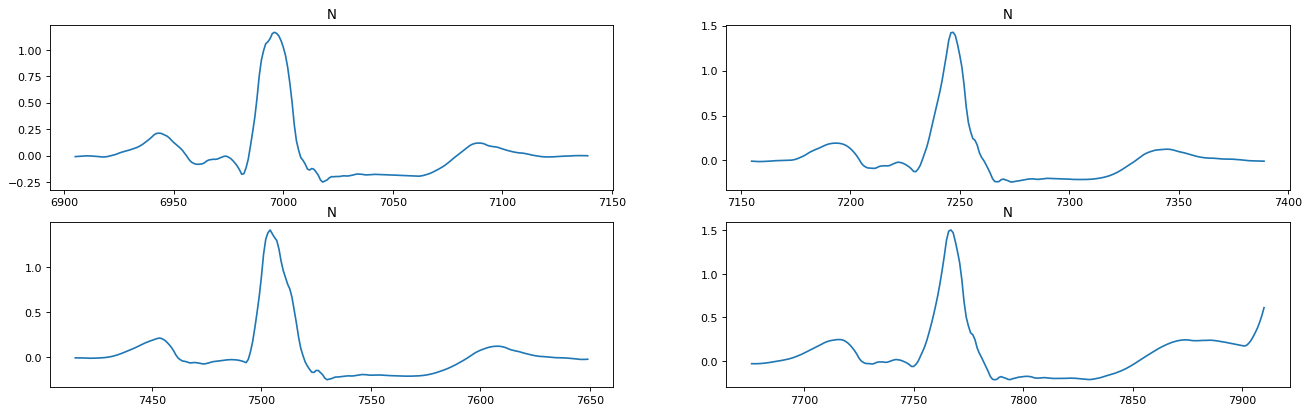

In [6]:
hb_num = 26
hb_set = '105'
plt.figure(figsize=(20, 6), dpi=80)
p1 = plt.subplot(221)
p1.plot(Hbs[hb_set]['lead0'][hb_num])
p1.set_title(Hbs[hb_set]['ann'][hb_num])
p2 = plt.subplot(222)
p2.plot(Hbs[hb_set]['lead0'][hb_num+1])
p2.set_title(Hbs[hb_set]['ann'][hb_num+1])
p3 = plt.subplot(223)
p3.plot(Hbs[hb_set]['lead0'][hb_num+2])
p3.set_title(Hbs[hb_set]['ann'][hb_num+2])
p4 = plt.subplot(224)
p4.plot(Hbs[hb_set]['lead0'][hb_num+3])
p4.set_title(Hbs[hb_set]['ann'][hb_num+3])
plt.show()

# Checking Overall Distribution of Lead0 and Lead1

ann:  {'Q', 'V', 'N'}
Heartbeats amount:  2572


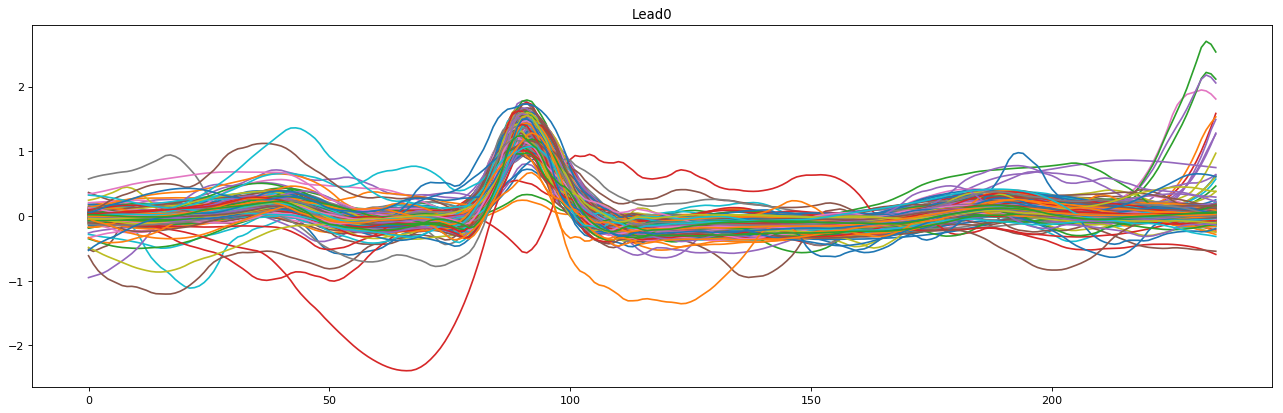

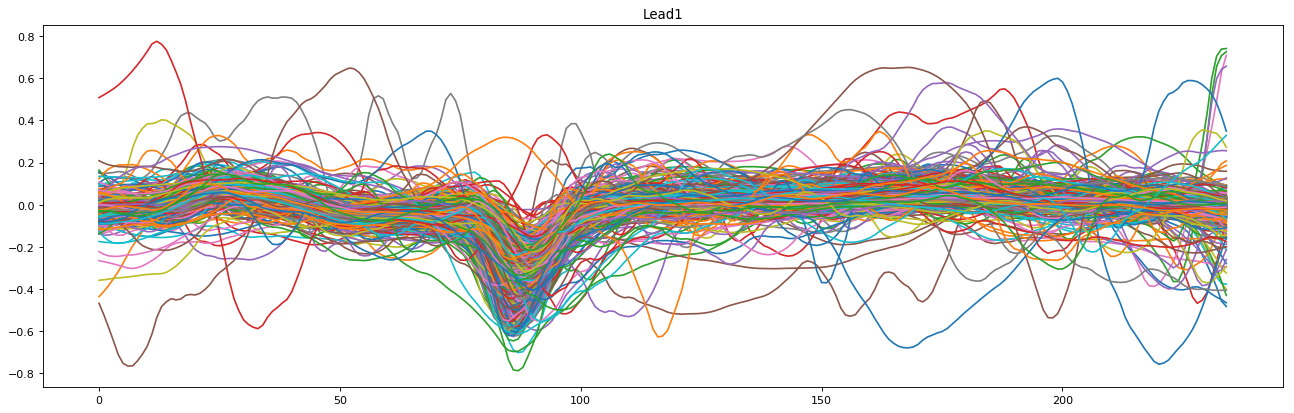

In [7]:
ds = '105'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead0')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead1')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

In [41]:
ds = '200'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(12, 12), dpi=100)
plt.subplots_adjust(wspace =0, hspace =0.3)
p1 = plt.subplot(311)
p1.set_title('N beats')
p1.set_ylim(-3, 2.5)
p2 = plt.subplot(312)
p2.set_title('V beats')
p2.set_ylim(-3, 2.5)
p3 = plt.subplot(313)
p3.set_title('S beats')
p3.set_ylim(-3, 2.5)

for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        p1.plot(temp)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in VEB:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        p2.plot(temp)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in SVEB:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        p3.plot(temp)
plt.savefig('nvs comparison')

ann:  {'F', 'V', 'N', 'A'}
Heartbeats amount:  2600


# Computing RR Intervals

In [8]:
for ds in DS2:
    dsLast = len(Hbs[ds]['annIdx']) - 1
    preRR = [np.NAN]
    postRR = [Hbs[ds]['annIdx'][1] - Hbs[ds]['annIdx'][0]]
    for l in range(1, dsLast):
        preRR.append(Hbs[ds]['annIdx'][l] - Hbs[ds]['annIdx'][l-1])
        postRR.append(Hbs[ds]['annIdx'][l+1] - Hbs[ds]['annIdx'][l])
    preRR.append(Hbs[ds]['annIdx'][dsLast] - Hbs[ds]['annIdx'][dsLast-1])
    postRR.append(np.NAN)
    Hbs[ds]['preRR'] = preRR
    Hbs[ds]['postRR'] = postRR

In [9]:
Hbs['232'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR
0,R,490,400 0.007363 401 0.007766 402 0.00581...,400 -0.001164 401 0.001159 402 0.00481...,NaN,246.0
1,A,736,646 -0.070390 647 -0.072349 648 -0.07297...,646 0.007862 647 0.003355 648 -0.00122...,246.0,263.0
2,A,999,909 -0.033484 910 -0.036418 911 -0.03...,909 -0.009404 910 -0.016164 911 -0.02...,263.0,659.0
3,R,1658,1568 -0.003482 1569 0.000955 1570 0.00...,1568 0.001779 1569 0.001739 1570 0.00...,659.0,244.0
4,A,1902,1812 -0.069205 1813 -0.083164 1814 -0.09...,1812 0.000287 1813 -0.004464 1814 -0.00...,244.0,253.0
5,A,2155,2065 -0.014496 2066 -0.021342 2067 -0.02...,2065 0.003141 2066 -0.004253 2067 -0.01...,253.0,673.0
6,R,2828,2738 0.004336 2739 0.000416 2740 -0.00...,2738 -0.009743 2739 -0.008125 2740 -0.00...,673.0,237.0
7,A,3065,2975 -0.066887 2976 -0.073088 2977 -0.07...,2975 -0.000077 2976 -0.002209 2977 -0.00...,237.0,601.0
8,R,3666,3576 0.024699 3577 0.019234 3578 0.01...,3576 -0.010855 3577 -0.007827 3578 -0.00...,601.0,242.0
9,A,3908,3818 -0.042828 3819 -0.051090 3820 -0.05...,3818 -0.005889 3819 -0.010767 3820 -0.01...,242.0,602.0


# Skewness and Kurtosis Calculation

In [10]:
for ds in DS2:
    dsLength = len(Hbs[ds]['annIdx'])
    skewness_0 = []
    kurtosis_0 = []
    skewness_1 = []
    kurtosis_1 = []
    for l in range(0, dsLength):
        skewness_0.append(Hbs[ds]['lead0'][l].skew())
        skewness_1.append(Hbs[ds]['lead1'][l].skew())
        kurtosis_0.append(Hbs[ds]['lead0'][l].kurt())
        kurtosis_1.append(Hbs[ds]['lead1'][l].kurt())
    Hbs[ds]['skewness_0'] = skewness_0
    Hbs[ds]['skewness_1'] = skewness_1
    Hbs[ds]['kurtosis_0'] = kurtosis_0
    Hbs[ds]['kurtosis_1'] = kurtosis_1

In [11]:
Hbs['105'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1
0,N,196,106 -0.004937 107 -0.004219 108 -0.00333...,106 -0.007967 107 -0.008052 108 -0.00818...,NaN,262.0,2.601941,-2.801888,7.034972,8.220483
1,N,458,368 -0.009107 369 -0.009101 370 -0.00906...,368 -0.015433 369 -0.015370 370 -0.01548...,262.0,249.0,2.769647,-3.236822,7.616273,11.084094
2,N,707,617 -0.010420 618 -0.011259 619 -0.01211...,617 -0.010648 618 -0.010306 619 -0.00969...,249.0,257.0,2.651710,-2.850410,7.189774,8.284084
3,N,964,874 -0.009713 875 -0.007352 876 -0.00...,874 -0.013572 875 -0.010633 876 -0.00...,257.0,257.0,2.690615,-2.604500,7.436339,6.926120
4,N,1221,1131 -0.007698 1132 -0.007219 1133 -0.00...,1131 -0.008761 1132 -0.008729 1133 -0.00...,257.0,257.0,2.818693,-2.873404,8.810617,8.207033
5,N,1478,1388 -0.008365 1389 -0.008917 1390 -0.00...,1388 -0.005801 1389 -0.005244 1390 -0.00...,257.0,262.0,2.880262,-2.867189,9.261381,7.743928
6,N,1740,1650 -0.005055 1651 -0.005037 1652 -0.00...,1650 -0.006915 1651 -0.008188 1652 -0.01...,262.0,274.0,2.595073,-2.571459,7.118607,6.690339
7,N,2014,1924 -0.008920 1925 -0.007501 1926 -0.00...,1924 -0.014562 1925 -0.013897 1926 -0.01...,274.0,272.0,2.684761,-2.714260,8.082212,7.071214
8,N,2286,2196 -0.008866 2197 -0.009031 2198 -0.00...,2196 -0.016138 2197 -0.014290 2198 -0.01...,272.0,263.0,2.920813,-2.771993,9.631048,7.341716
9,N,2549,2459 0.001073 2460 0.000845 2461 0.00...,2459 -0.015148 2460 -0.014617 2461 -0.01...,263.0,253.0,2.915925,-2.507761,9.231087,6.045474


# DWT-based Features

In [12]:
wavelet = pywt.Wavelet('haar')
for ds in DS2:
    dsLength = len(Hbs[ds]['annIdx'])
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for l in range(0, dsLength):
        beat = list(Hbs[ds]['lead0'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead0.append(list(coffs[0]))
        cD7_lead0.append(list(coffs[1]))
        cD6_lead0.append(list(coffs[2]))
        cD5_lead0.append(list(coffs[3]))
        cD4_lead0.append(list(coffs[4]))
        cD3_lead0.append(list(coffs[5]))
        cD2_lead0.append(list(coffs[6]))
        cD1_lead0.append(list(coffs[7]))
        
        beat = list(Hbs[ds]['lead1'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead1.append(list(coffs[0]))
        cD7_lead1.append(list(coffs[1]))
        cD6_lead1.append(list(coffs[2]))
        cD5_lead1.append(list(coffs[3]))
        cD4_lead1.append(list(coffs[4]))
        cD3_lead1.append(list(coffs[5]))
        cD2_lead1.append(list(coffs[6]))
        cD1_lead1.append(list(coffs[7]))
    
    Hbs[ds]['cA7_0'] = cA7_lead0
    Hbs[ds]['cD7_0'] = cD7_lead0
    Hbs[ds]['cD6_0'] = cD6_lead0
    Hbs[ds]['cD5_0'] = cD5_lead0
    Hbs[ds]['cD4_0'] = cD4_lead0
    Hbs[ds]['cD3_0'] = cD3_lead0
    Hbs[ds]['cD2_0'] = cD2_lead0
    Hbs[ds]['cD1_0'] = cD1_lead0
    
    Hbs[ds]['cA7_1'] = cA7_lead1
    Hbs[ds]['cD7_1'] = cD7_lead1
    Hbs[ds]['cD6_1'] = cD6_lead1
    Hbs[ds]['cD5_1'] = cD5_lead1
    Hbs[ds]['cD4_1'] = cD4_lead1
    Hbs[ds]['cD3_1'] = cD3_lead1
    Hbs[ds]['cD2_1'] = cD2_lead1
    Hbs[ds]['cD1_1'] = cD1_lead1

In [13]:
Hbs['105'].head(1)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1,...,cD2_0,cD1_0,cA7_1,cD7_1,cD6_1,cD5_1,cD4_1,cD3_1,cD2_1,cD1_1
0,N,196,106 -0.004937 107 -0.004219 108 -0.00333...,106 -0.007967 107 -0.008052 108 -0.00818...,NaN,262.0,2.601941,-2.801888,7.034972,8.220483,...,"[-0.00172880159107, -0.00020906829891, 0.00069...","[-0.000507475260147, -0.00068256234757, -0.000...","[-0.748547561228, 0.388867900893]","[0.72235271143, 0.315912048669]","[0.205435497306, -0.895865646611, -0.093672385...","[-0.127526365298, 0.0854209687727, 0.922187499...","[-0.0323498103299, 0.068751482604, 0.060469309...","[-0.0024840193115, -0.0237371066225, -0.031106...","[0.000271371156292, -0.00243704968476, -0.0044...","[5.98527282489e-05, 0.000137504688834, -0.0006..."


In [14]:
list(Hbs['105'].columns.values)

['ann',
 'annIdx',
 'lead0',
 'lead1',
 'preRR',
 'postRR',
 'skewness_0',
 'skewness_1',
 'kurtosis_0',
 'kurtosis_1',
 'cA7_0',
 'cD7_0',
 'cD6_0',
 'cD5_0',
 'cD4_0',
 'cD3_0',
 'cD2_0',
 'cD1_0',
 'cA7_1',
 'cD7_1',
 'cD6_1',
 'cD5_1',
 'cD4_1',
 'cD3_1',
 'cD2_1',
 'cD1_1']

# 把lead0和lead1分成2个数据集

In [15]:
Hbs_lead0 = {}
Hbs_lead1 = {}

for ds in DS2:
    Hbs_lead0[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead0'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_0'],
        'kurtosis': Hbs[ds]['kurtosis_0'],
        'cA7': Hbs[ds]['cA7_0'],
        'cD7': Hbs[ds]['cD7_0'],
        'cD6': Hbs[ds]['cD6_0'],
        'cD5': Hbs[ds]['cD5_0'],
        'cD4': Hbs[ds]['cD4_0'],
        'cD3': Hbs[ds]['cD3_0'],
        'cD2': Hbs[ds]['cD2_0'],
        'cD1': Hbs[ds]['cD1_0'],
    })
    
    Hbs_lead1[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead1'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_1'],
        'kurtosis': Hbs[ds]['kurtosis_1'],
        'cA7': Hbs[ds]['cA7_1'],
        'cD7': Hbs[ds]['cD7_1'],
        'cD6': Hbs[ds]['cD6_1'],
        'cD5': Hbs[ds]['cD5_1'],
        'cD4': Hbs[ds]['cD4_1'],
        'cD3': Hbs[ds]['cD3_1'],
        'cD2': Hbs[ds]['cD2_1'],
        'cD1': Hbs[ds]['cD1_1'],
    })

In [16]:
Hbs_lead0['105'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness
0,N,196,106 -0.004937 107 -0.004219 108 -0.00333...,"[1.58447775016, -0.369850292777]","[-0.000507475260147, -0.00068256234757, -0.000...","[-0.00172880159107, -0.00020906829891, 0.00069...","[-0.0031979442446, -0.0139790958607, -0.064020...","[-0.0110431117744, -0.168800178777, 0.28662256...","[-0.306824452062, 0.517659020674, -2.968867635...","[0.0894713605368, 1.88221247725, -0.8101197116...","[-1.09534810284, -0.714946507471]",7.034972,262.0,NaN,2.601941


# Save Extracted Feature to CSV

In [17]:
# 为了处理 beat（series类型）无法正确存在csv里的情况
for ds in DS2:
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead0[ds]['beat'])):
        beatValues.append(list(Hbs_lead0[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead0[ds]['beat'][i].index))
    Hbs_lead0[ds]['beatValues'] = beatValues
    Hbs_lead0[ds]['beatIndex'] = beatIndexs
    
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead1[ds]['beat'])):
        beatValues.append(list(Hbs_lead1[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead1[ds]['beat'][i].index))
    Hbs_lead1[ds]['beatValues'] = beatValues
    Hbs_lead1[ds]['beatIndex'] = beatIndexs

In [18]:
Hbs_lead0['105'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,196,106 -0.004937 107 -0.004219 108 -0.00333...,"[1.58447775016, -0.369850292777]","[-0.000507475260147, -0.00068256234757, -0.000...","[-0.00172880159107, -0.00020906829891, 0.00069...","[-0.0031979442446, -0.0139790958607, -0.064020...","[-0.0110431117744, -0.168800178777, 0.28662256...","[-0.306824452062, 0.517659020674, -2.968867635...","[0.0894713605368, 1.88221247725, -0.8101197116...","[-1.09534810284, -0.714946507471]",7.034972,262.0,NaN,2.601941,"[-0.00493679325974, -0.00421911486428, -0.0033...","[106, 107, 108, 109, 110, 111, 112, 113, 114, ..."


In [19]:
for ds in DS2:
    Hbs_lead0[ds].to_csv('Extracted Features/DS2/' + ds + '_lead0.csv', index=False)
    Hbs_lead1[ds].to_csv('Extracted Features/DS2/' + ds + '_lead1.csv', index=False)

In [20]:
testReadData = pd.read_csv('Extracted Features/DS2/' + '105' + '_lead0.csv')
testReadData.head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,196,106 -0.004937\r\n107 -0.004219\r\n108 -0...,"[1.5844777501600635, -0.36985029277674747]","[-0.00050747526014730763, -0.00068256234757034...","[-0.0017288015910721919, -0.000209068298910263...","[-0.0031979442446018165, -0.013979095860740283...","[-0.011043111774410757, -0.16880017877670617, ...","[-0.30682445206178982, 0.51765902067372427, -2...","[0.08947136053677307, 1.8822124772535171, -0.8...","[-1.0953481028411476, -0.71494650747124666]",7.034972,262.0,NaN,2.601941,"[-0.0049367932597447822, -0.004219114864275645...","[106, 107, 108, 109, 110, 111, 112, 113, 114, ..."


# Experiment - Clustering

检查各个心跳类别在RR Interval特征上的分布情况

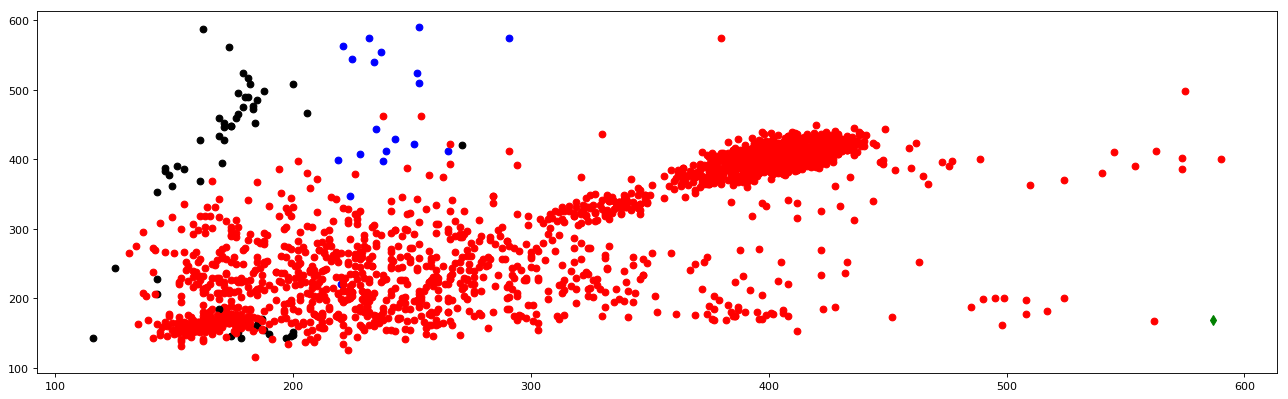

In [17]:
ds = '202'
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = []
beatIdxs = []
for i in range(1, len(Hbs[ds]['ann'])-1):
    if Hbs[ds]['preRR'][i] > 1000 or Hbs[ds]['postRR'][i] > 1000:
        continue
    featureCols.append([Hbs[ds]['preRR'][i], Hbs[ds]['postRR'][i]])
    beatIdxs.append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for i, features in enumerate(featureCols):
    color = 'dg'
    if Hbs[ds]['ann'][beatIdxs[i]] in N:
        color = mark[0]
    elif Hbs[ds]['ann'][beatIdxs[i]] in VEB:
        color = mark[1]
    elif Hbs[ds]['ann'][beatIdxs[i]] in SVEB:
        color = mark[3]
    plt.plot(features[0], features[1], color)
plt.show()

检查各个心跳类别在skewness和kurtosis特征上的分布情况

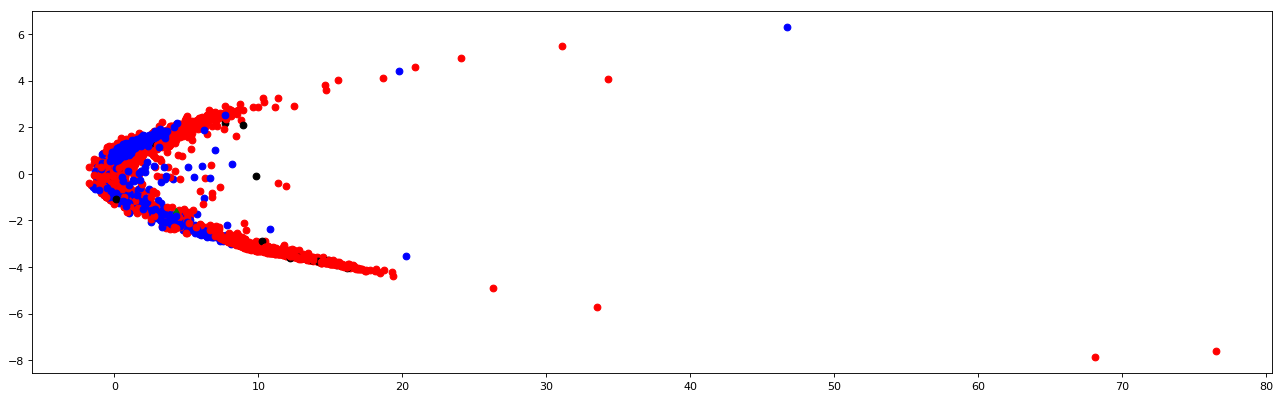

In [37]:
dsCol = ['200']
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = {}
beatIdxs = {}
for ds in dsCol:
    featureCols[ds] = []
    beatIdxs[ds] = []
    for i in range(1, len(Hbs[ds]['ann'])-1):
        featureCols[ds].append([Hbs[ds]['kurtosis_1'][i], Hbs[ds]['skewness_1'][i]])
        beatIdxs[ds].append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for ds in dsCol:
    for i, features in enumerate(featureCols[ds]):
        color = 'dg'
        if Hbs[ds]['ann'][beatIdxs[ds][i]] in N:
            color = mark[0]  # 红色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in VEB:
            color = mark[1]  # 蓝色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in SVEB:
            color = mark[3] # 黑色圆点
        plt.plot(features[0], features[1], color)
plt.show()

### 综上所述，RR Interval对S类周期异常的分类效果比较明显，skewness和kurtosis对V型异常分类效果比较明显

检查各个心跳类别在小波系数特征上的分布情况

In [45]:
ds = '213'

featureCols = list(Hbs[ds]['cD4_0'])

plt.figure(figsize=(15, 12), dpi=100)
p1 = plt.subplot(221)
p1.set_title('Normal')
p1.set_ylim(-5,5)
p2 = plt.subplot(222)
p2.set_title('S beats')
p2.set_ylim(-5,5)
p3 = plt.subplot(223)
p3.set_title('V beats')
p3.set_ylim(-5,5)
p4 = plt.subplot(224)
p4.set_title('Others')
p4.set_ylim(-5,5)

for i, feature in enumerate(featureCols):
    if Hbs[ds]['ann'][i] in N:
        p1.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in SVEB:
        p2.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in VEB:
        p3.plot(featureCols[i])
    else:
        p4.plot(featureCols[i])

plt.savefig('cd4')